<a href="https://colab.research.google.com/github/AbhishekSharma70/ML-Algorithms/blob/main/LogisticRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("insurancedata.csv")
df.head()

,Age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


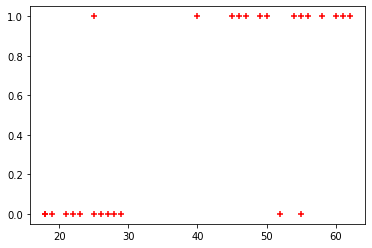

In [ ]:
plt.scatter(df.Age,df.bought_insurance,marker='+',color='red')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df[['Age']],df[['bought_insurance']],test_size=0.2)


In [ ]:
X_train

,Age
8,62
21,26
22,40
17,58
23,45
3,52
20,21
26,23
13,29
7,60


In [ ]:
X_test

,Age
5,56
16,25
9,61
6,55
10,18
12,27


In [ ]:
Y_train

,bought_insurance
8,1
15,1
11,0
1,0
25,1
19,0
10,0
13,0
12,0
2,1


In [ ]:
Y_test

,bought_insurance
21,0
26,0
24,1
6,0
17,1
0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
Y_predicted=model.predict(X_test)
Y_predicted

array([0, 0, 1, 1, 1, 0])

In [ ]:
model.score(X_test,Y_test)

0.8333333333333334

In [ ]:
Y_test

,bought_insurance
21,0
26,0
24,1
6,0
17,1
0,0


In [ ]:
model.predict_proba(X_test)

array([[0.82239091, 0.17760909],
       [0.88045299, 0.11954701],
       [0.1015484 , 0.8984516 ],
       [0.0495652 , 0.9504348 ],
       [0.03174603, 0.96825397],
       [0.89580191, 0.10419809]])

In [ ]:
model.coef_

array([[0.15469867]])

In [ ]:
model.intercept_

array([-5.5547963])

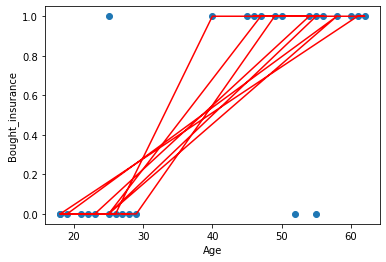

In [ ]:
plt.xlabel('Age')
plt.ylabel('Bought_insurance')
plt.scatter(df.Age,df.bought_insurance)
plt.plot(df.Age,model.predict(df[['Age']]),color='Red')

In [ ]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
def prediction_function(age):
  z=0.042*age-1.53
  y=sigmoid(z)
  return y

In [ ]:
age=35
prediction_function(age)

0.4850044983805899

In [ ]:
age=43
prediction_function(age)

0.568565299077705

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as file:
  pickle.dump(model,file)

In [ ]:
with open('model_pickle','rb') as file:
  mp=pickle.load(file)

In [ ]:
mp.predict([[20]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
mp.predict([[69]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])